In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("stud.csv")
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']
print(len(numeric_features),numeric_features)
print(len(categorical_features),categorical_features)

3 ['math_score', 'reading_score', 'writing_score']
5 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [5]:
df["Total"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["Average"]=df["Total"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [6]:
math_full=df[df['math_score']==100]['Average'].count()
reading_full=df[df['reading_score']==100]['Average'].count()
writing_full=df[df['writing_score']==100]['Average'].count()
math_full,reading_full,writing_full

(7, 17, 14)

In [7]:
math_20=df[df['math_score']<=20]['Average'].count()
reading_20=df[df['reading_score']<=20]['Average'].count()
writing_20=df[df['writing_score']<=20]['Average'].count()
math_20,reading_20,writing_20

(4, 1, 3)

<Axes: xlabel='Average', ylabel='Count'>

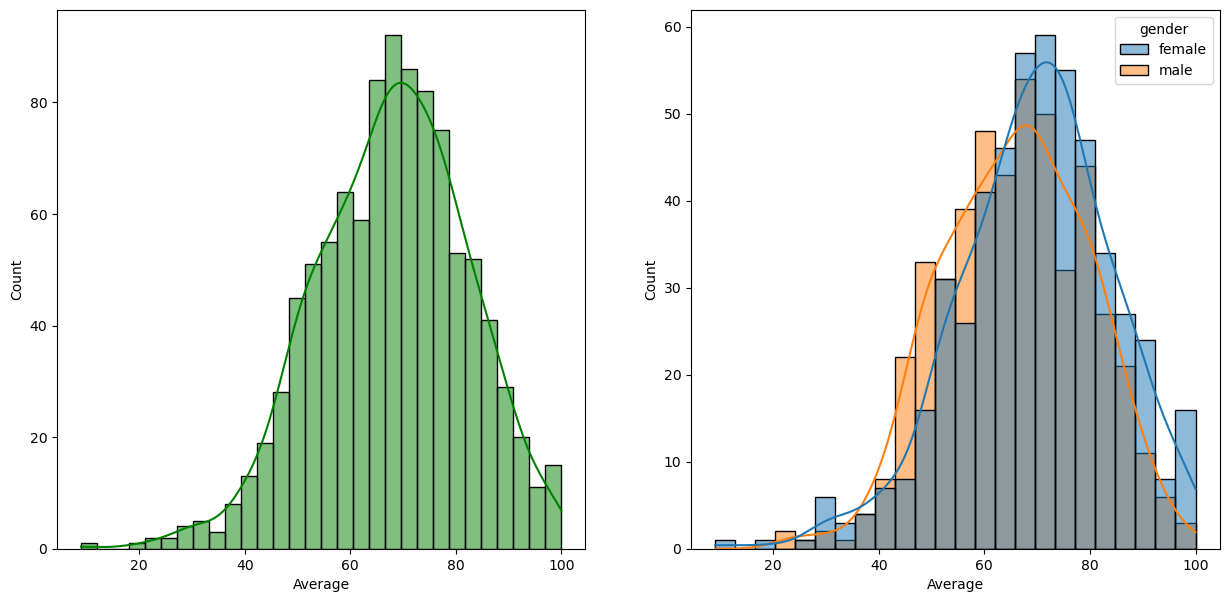

In [8]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='Average',bins=30,kde=True,color='g',ax=ax1)
sns.histplot(data=df,x='Average',kde=True,hue='gender')

<Axes: xlabel='Average', ylabel='Count'>

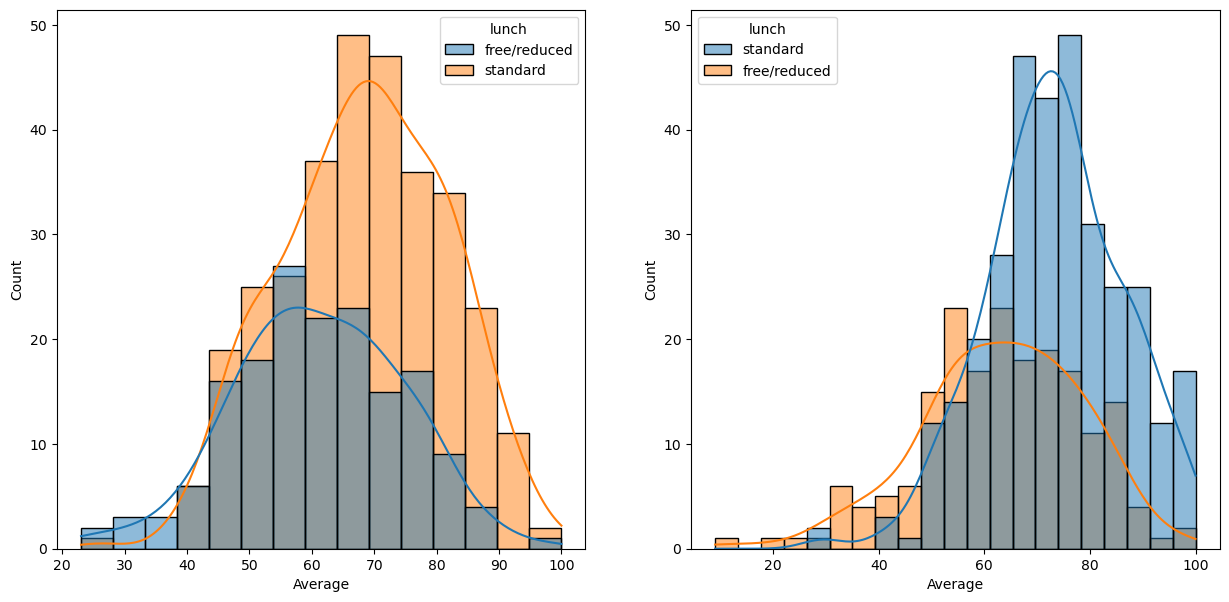

In [9]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df[df['gender']=='male'],x='Average',hue='lunch',kde=True,ax=ax1)
sns.histplot(data=df[df['gender']=='female'],x='Average',hue='lunch',kde=True,ax=ax2)

(0.0, 40.0)

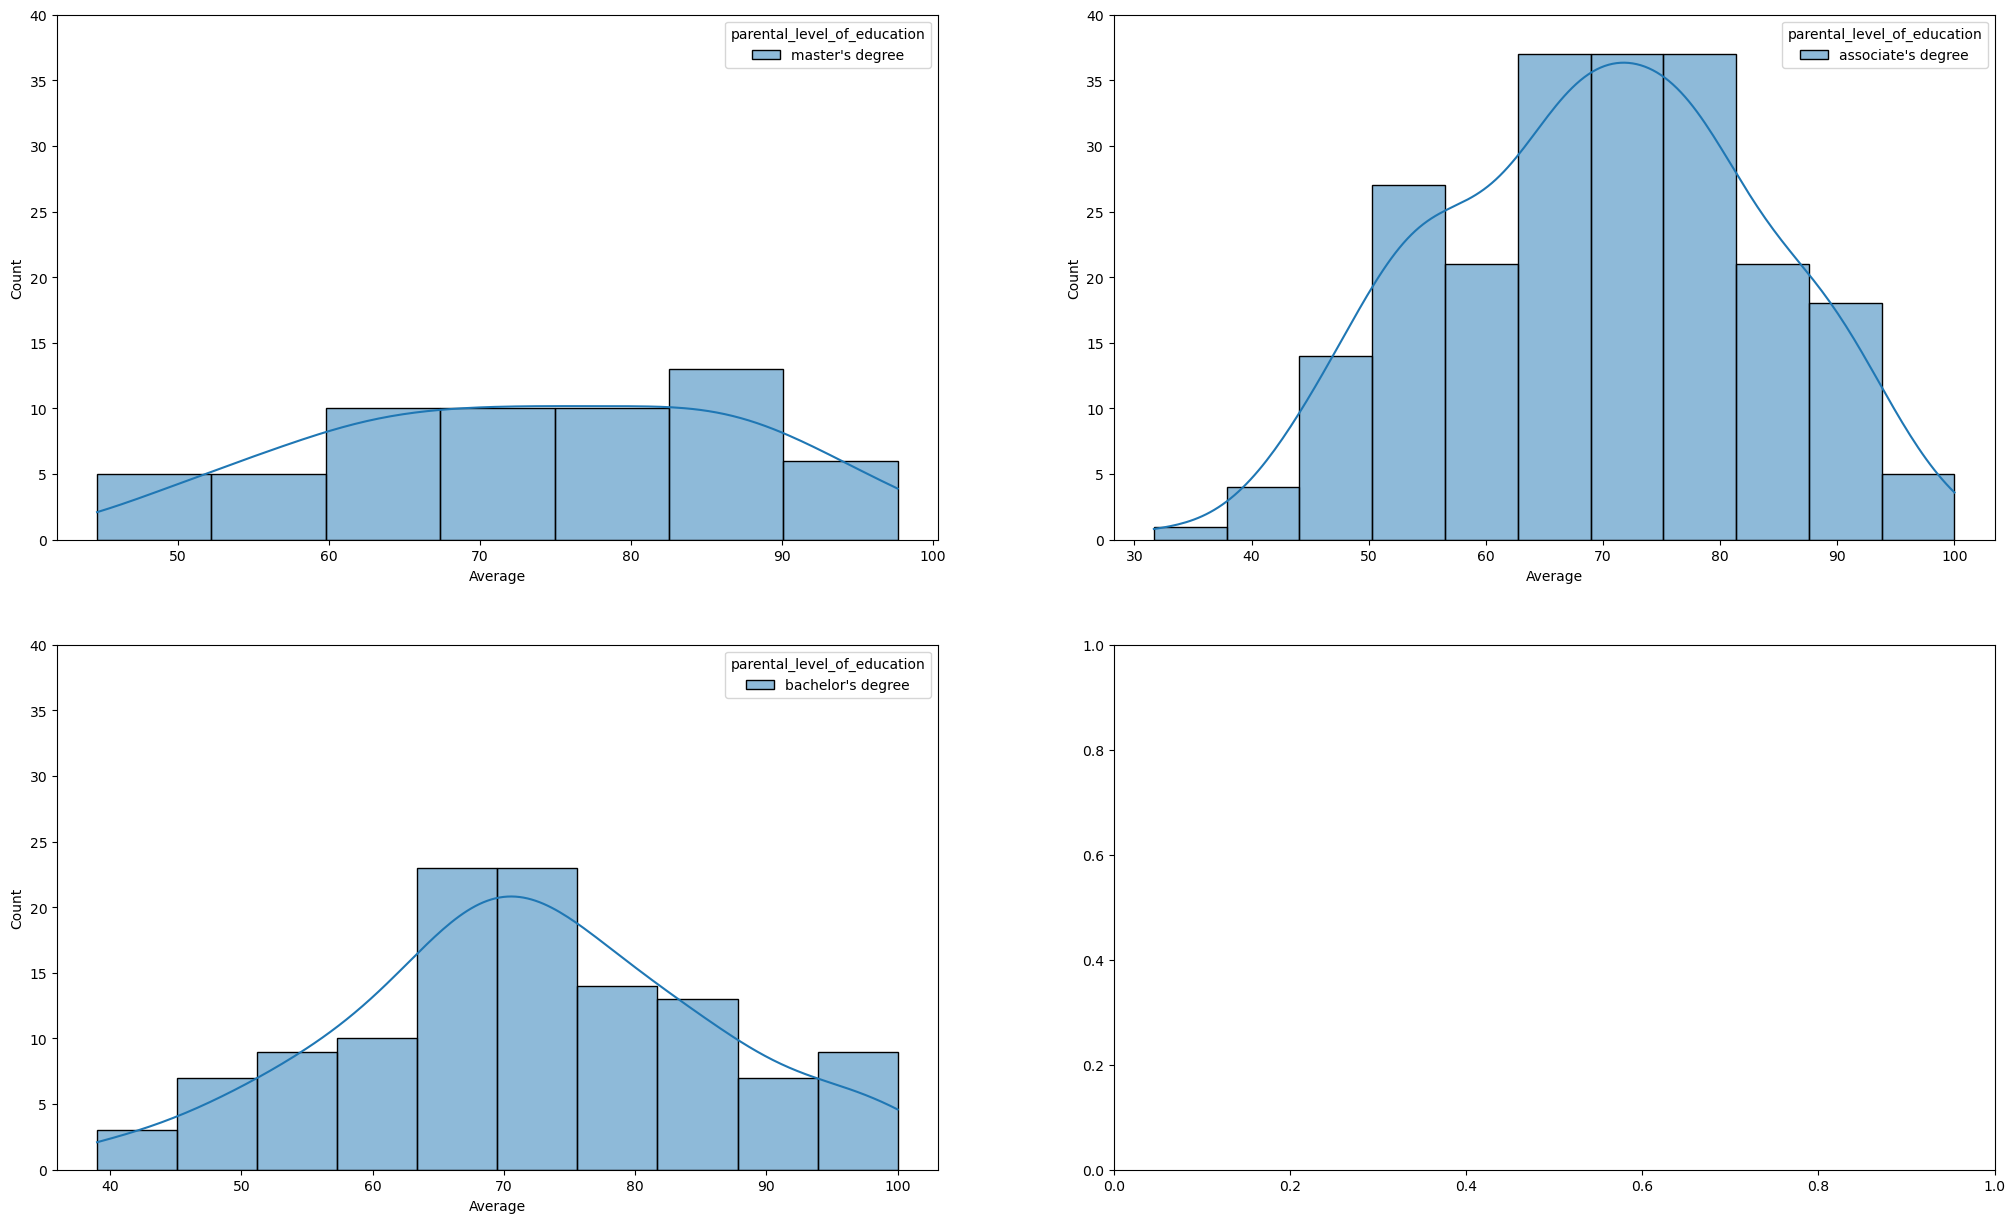

In [10]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(25,15))

df1=df[df['parental_level_of_education']=="master's degree"]
df2=df[df['parental_level_of_education']=="associate's degree"]
df3=df[df['parental_level_of_education']=="bachelor's degree"]
sns.histplot(data=df1,x='Average',hue='parental_level_of_education',kde=True,ax=ax1)
ax1.set_ylim(0,40)
sns.histplot(data=df2,x='Average',hue='parental_level_of_education',kde=True,ax=ax2)
ax2.set_ylim(0,40)
sns.histplot(data=df3,x='Average',hue='parental_level_of_education',kde=True,ax=ax3)
ax3.set_ylim(0,40)

<Axes: xlabel='test_preparation_course', ylabel='Average'>

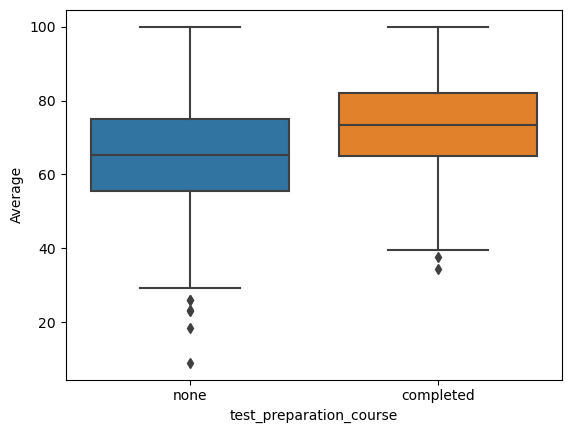

In [36]:
sns.boxplot(x="test_preparation_course",y="Average",data=df)

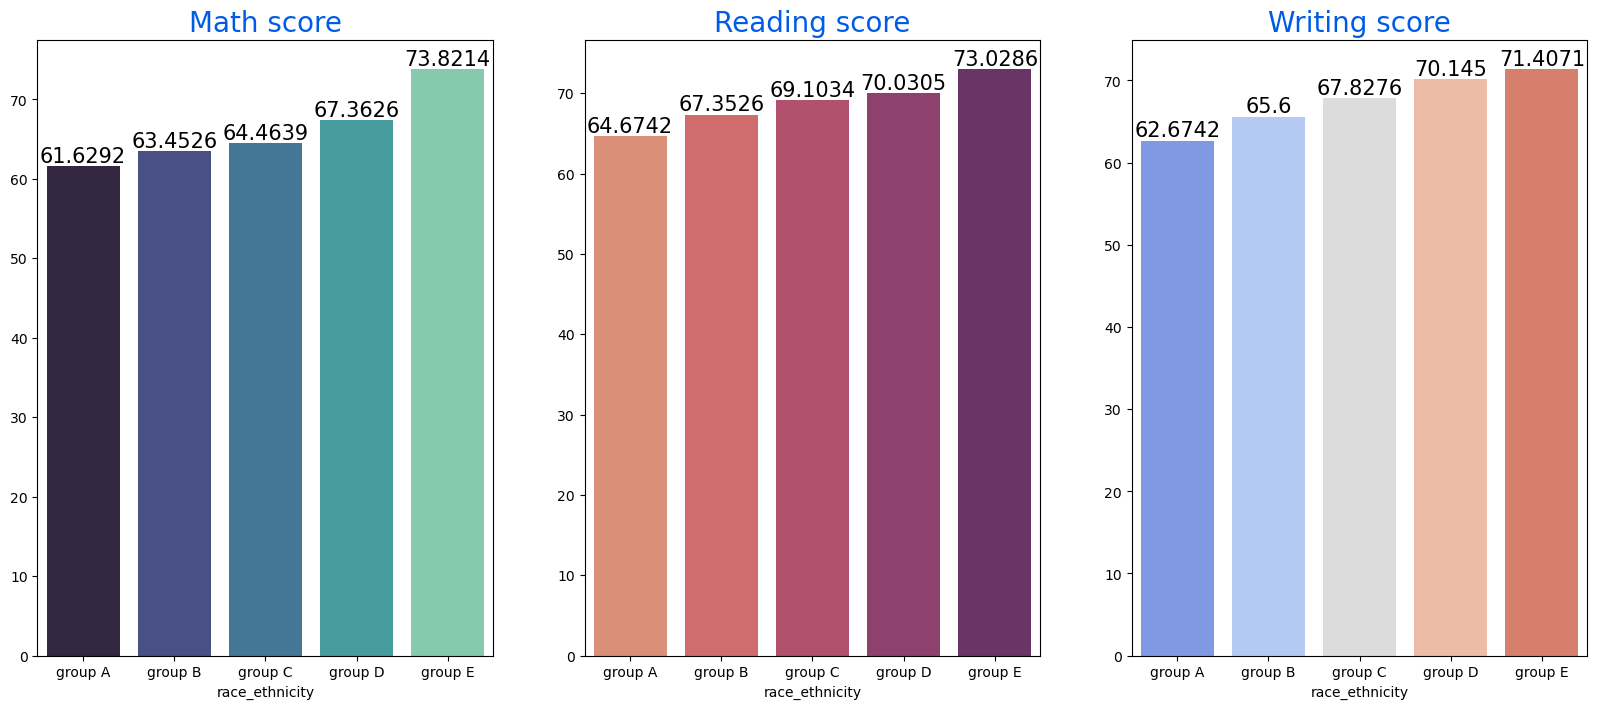

In [39]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

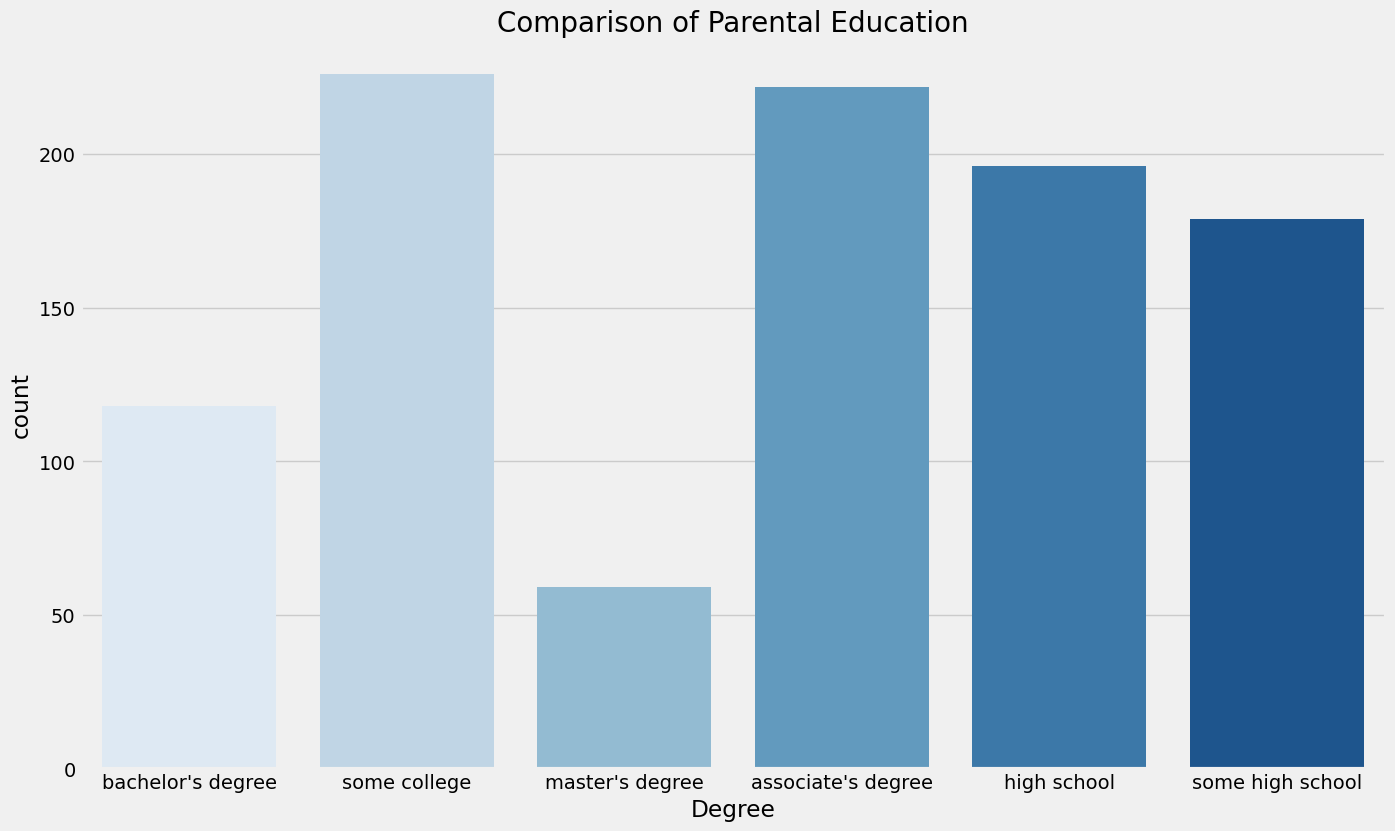

In [66]:
# plt.rcParams['figure.figsize'] = (15, 9)
#plt.style.use('fivethirtyeight')
sns.countplot(x="parental_level_of_education",data=df ,palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

<Axes: xlabel='parental_level_of_education'>

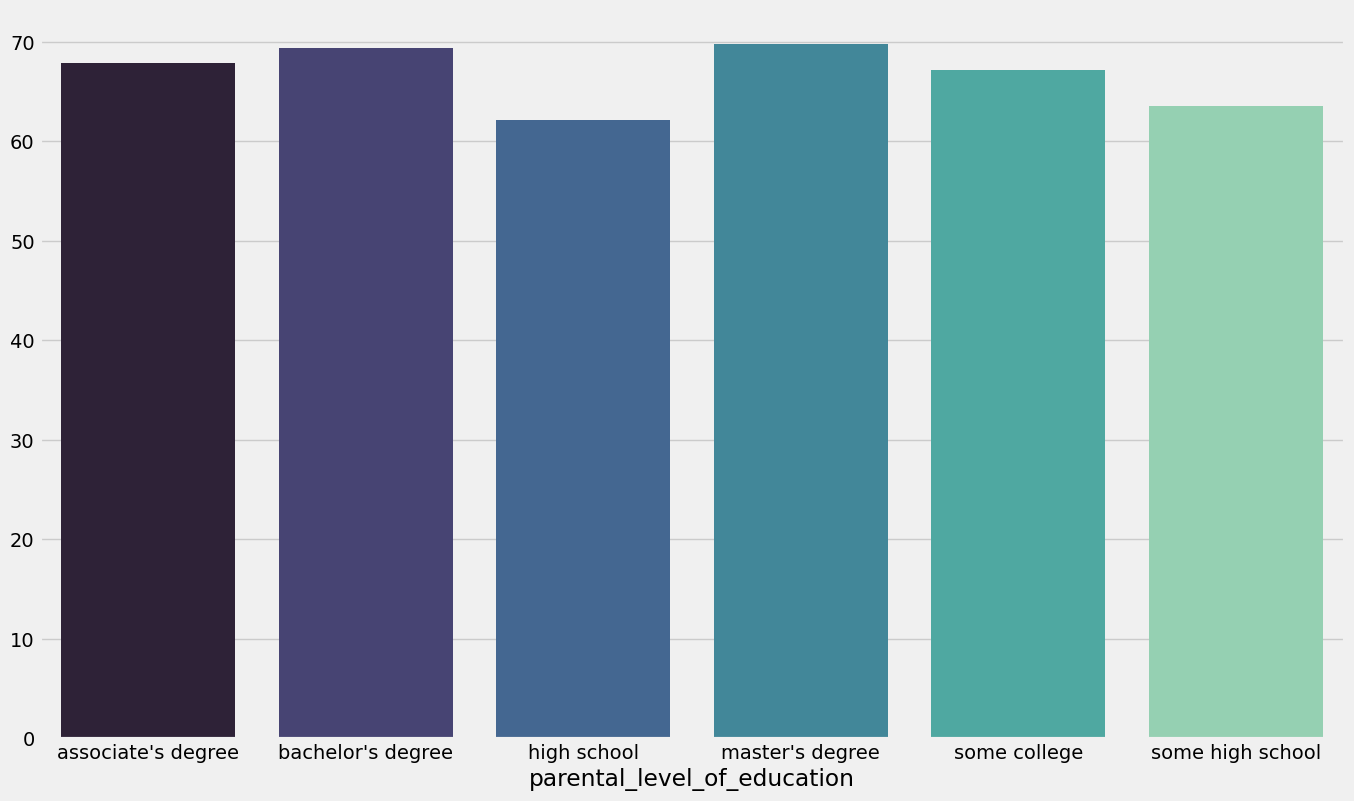

In [91]:
dfz=df.groupby('parental_level_of_education')
#dfza=dfz["math_score"].mean()
dfza
# dfz_melted = pd.melt(dfz, id_vars=['parental_level_of_education'], var_name='score_type', value_name='mean_score')

sns.barplot(x=dfz["math_score"].mean().index,y=dfz["math_score"].mean().values,palette = 'mako')

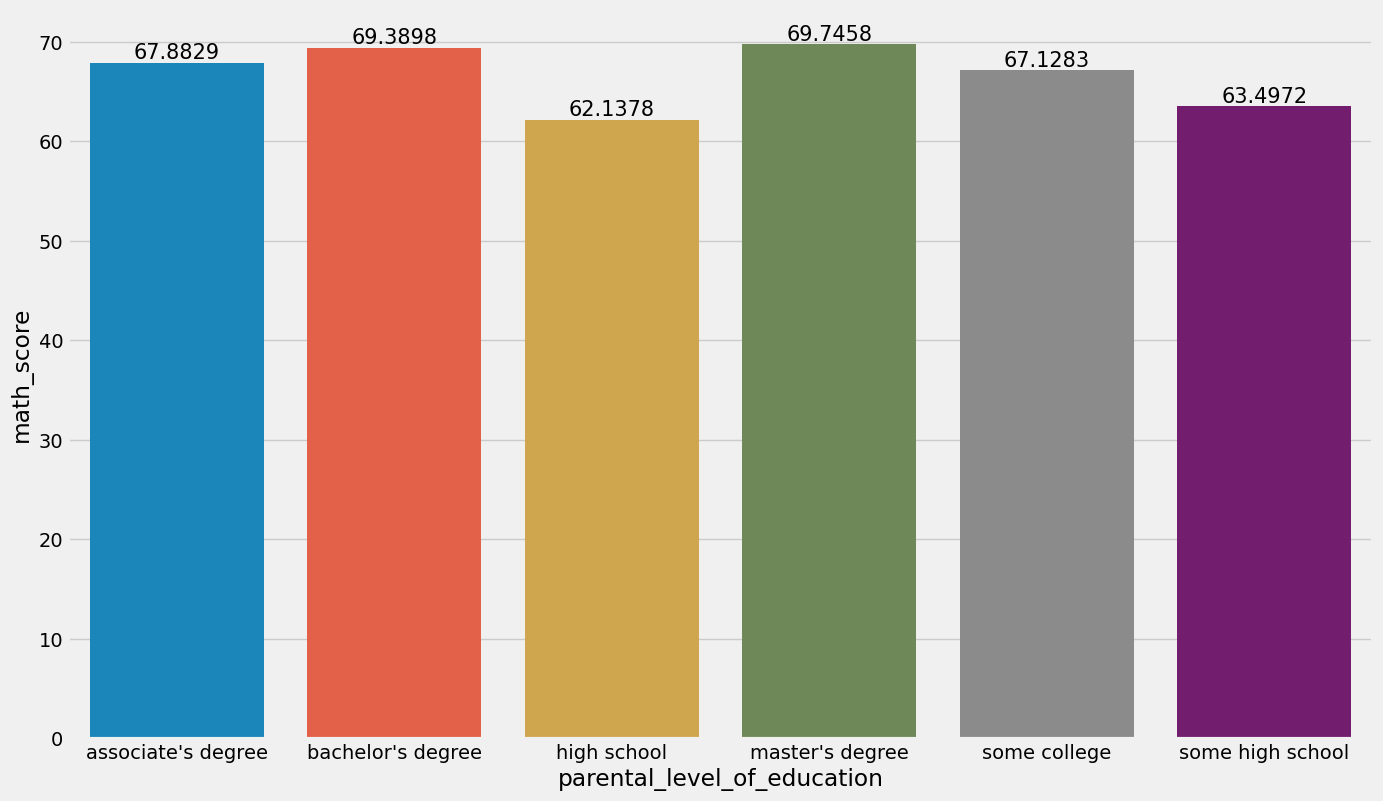

In [102]:
dfzb=df.groupby('parental_level_of_education').agg({"math_score":"mean","reading_score":"mean","writing_score":"mean","Average":"mean"}).reset_index()
dfzb
ax=sns.barplot(x="parental_level_of_education",y="math_score",data=dfzb)
for conatiner in ax.containers:
    ax.bar_label(conatiner,color="black",size=15)

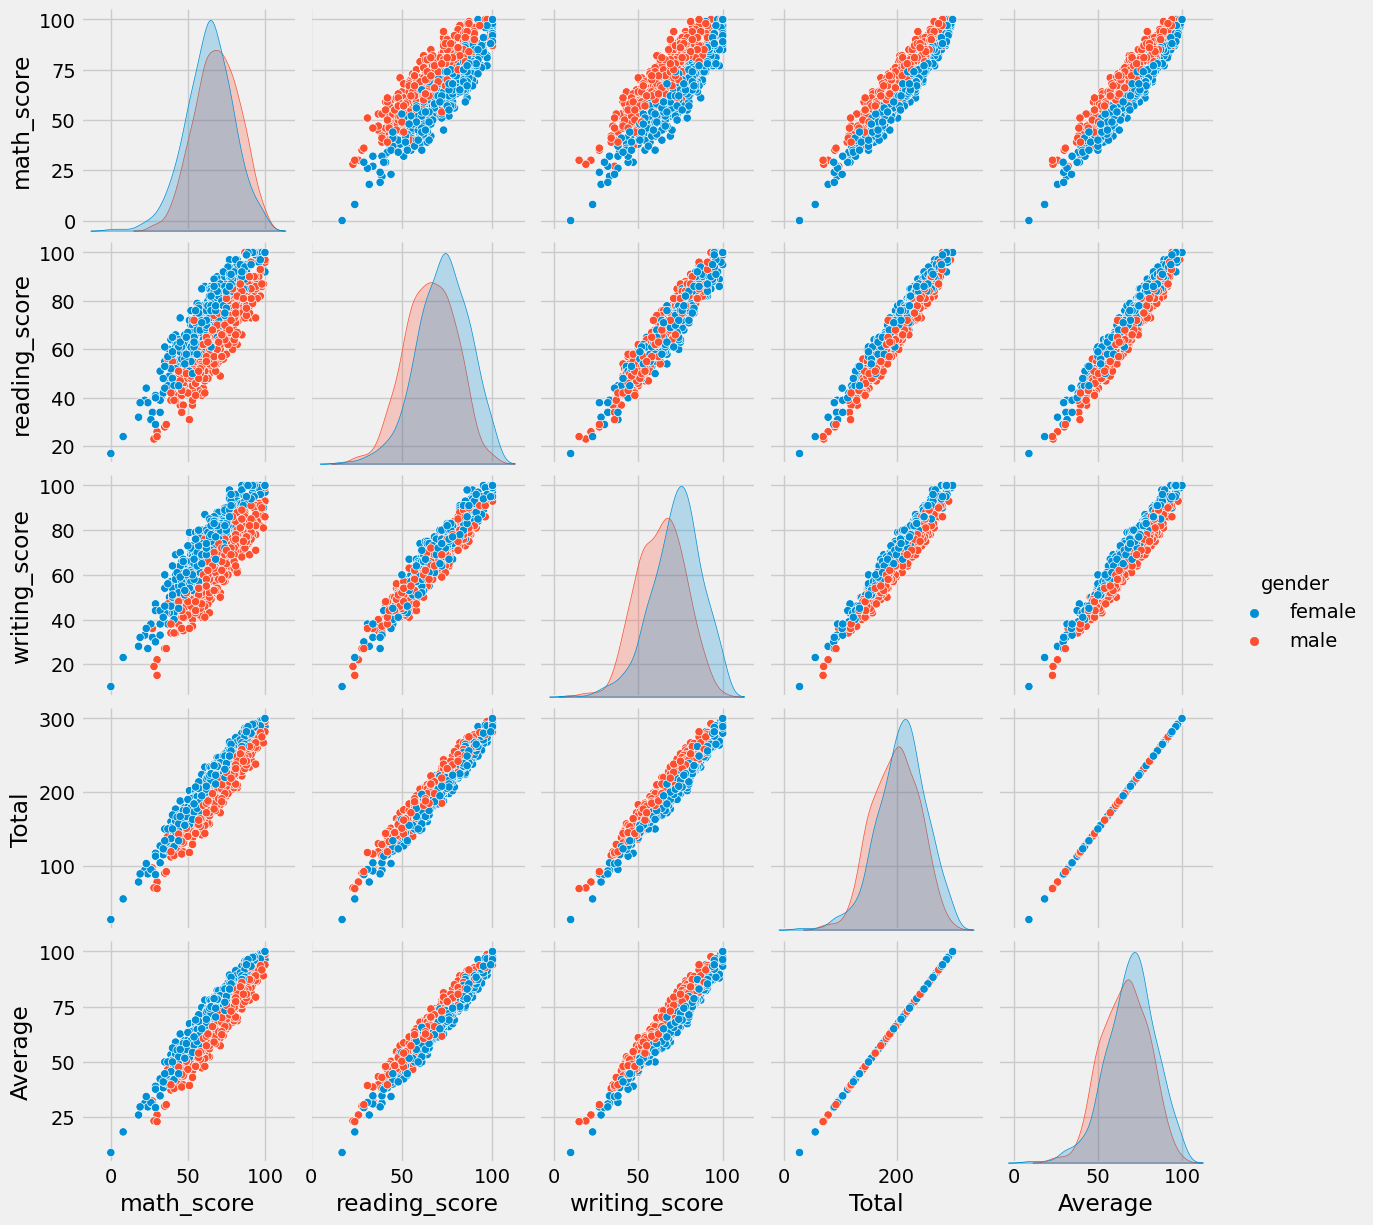

In [103]:
sns.pairplot(df,hue = 'gender')
plt.show()